# MA214 Network Analysis Assignment

## Group Name: Powerpuff
Student ID: 2315529, 2311922, 2315788, 2311621, 2311188

### Dataset
- Europe Roads
> https://networkrepository.com/inf-euroroad.php
- City Names
> http://konect.cc/networks/subelj_euroroad/

The data set Represent road network in Europe.
- Nodes: Cities.
- Edges: Connected road between cities.

### Analysis
- Draw graph and count number of Node and Edge
- Adjacency Matrix
- Check for Cyclic or Acyclic Graph
- Shortest Path
- Diameter
- Density
- Degree Distribution
- K-Core
- Closeness and Betweenness Centrality
- Local and Global Clustering Coefficient
- Modularity
- Watts-Strogatz Model

In [1]:
# Import Library
import networkx as nx
from networkx.algorithms import bipartite
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics as st

In [2]:
# Load the dataset
# Open the file, skipping the first two lines
with open('datasets/inf-euroroad.edges', 'r') as file:
    # Skip the first two lines
    next(file)
    next(file)

    # Create the graph from the remaining lines
    graph = nx.read_edgelist(file, create_using=nx.Graph())

### Draw graph and count number of Node and Edge

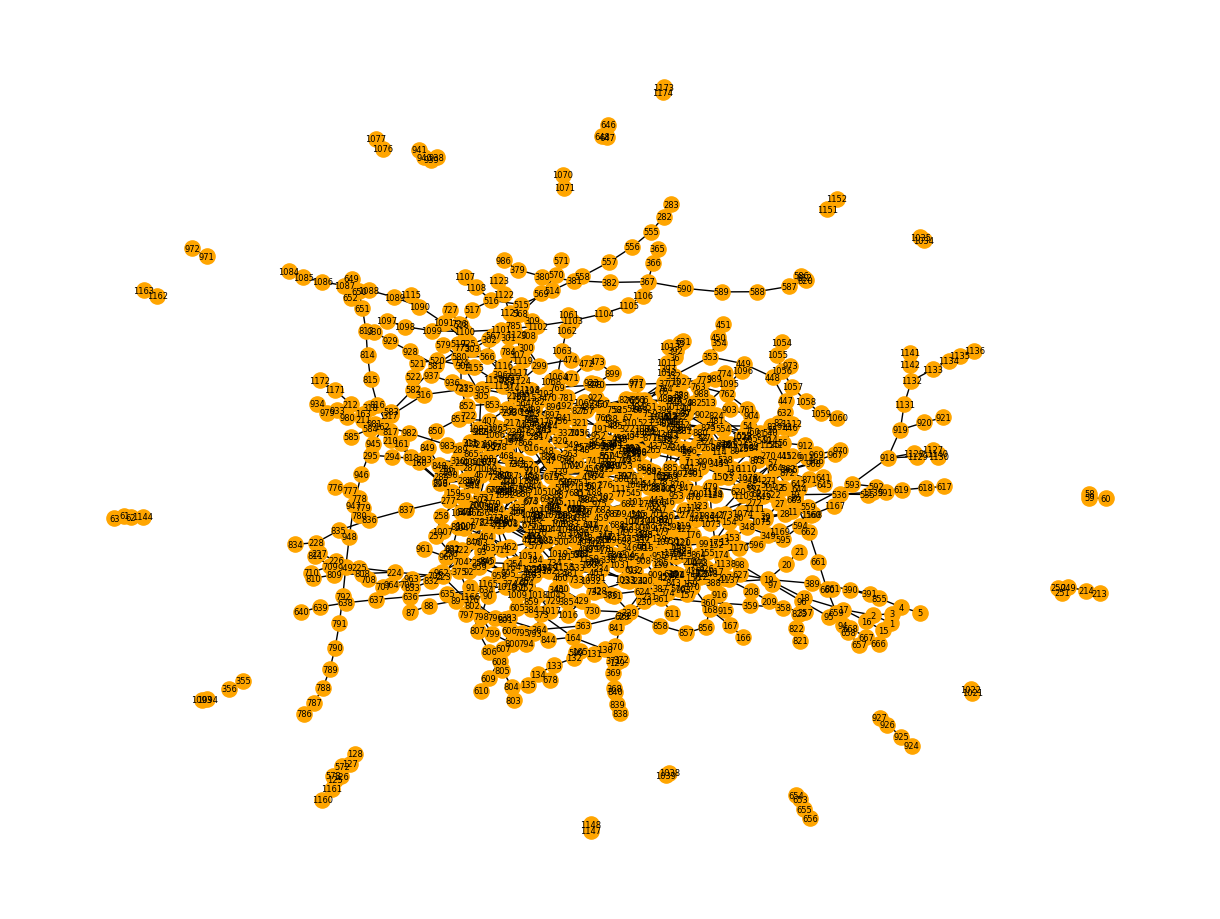

In [3]:
# Draw the graph
plt.figure(figsize=(12, 9))
nx.draw(graph, with_labels=True,node_size=120, font_size=6, node_color='orange')
plt.savefig('euroroad.png')
plt.show()

In [4]:
# Compute the number of Nodes
node_count = graph.number_of_nodes()
print(f"Number of Nodes: {node_count}")

Number of Nodes: 1174


In [5]:
# Compute the number of Edges
edge_count = graph.number_of_edges()
print(f"Number of Edges: {edge_count}")

Number of Edges: 1417


### Adjacency Matrix

In [6]:
# Adjacency Matrix
adj_matrix = nx.adjacency_matrix(graph)
print(f"adjacency_matrix\n{adj_matrix}")

adjacency_matrix
  (0, 1)	1
  (1, 0)	1
  (1, 2)	1
  (1, 3)	1
  (2, 1)	1
  (2, 4)	1
  (3, 1)	1
  (3, 37)	1
  (3, 38)	1
  (4, 2)	1
  (4, 5)	1
  (4, 6)	1
  (5, 4)	1
  (6, 4)	1
  (6, 647)	1
  (7, 8)	1
  (7, 9)	1
  (8, 7)	1
  (8, 10)	1
  (8, 11)	1
  (8, 12)	1
  (8, 13)	1
  (8, 14)	1
  (8, 15)	1
  (8, 16)	1
  :	:
  (1153, 1154)	1
  (1154, 1153)	1
  (1154, 1155)	1
  (1155, 1154)	1
  (1156, 34)	1
  (1157, 1152)	1
  (1158, 1159)	1
  (1159, 1158)	1
  (1160, 1161)	1
  (1161, 1160)	1
  (1162, 60)	1
  (1163, 234)	1
  (1164, 1165)	1
  (1165, 1164)	1
  (1166, 813)	1
  (1166, 1167)	1
  (1167, 1166)	1
  (1168, 1169)	1
  (1169, 1168)	1
  (1169, 1170)	1
  (1170, 369)	1
  (1170, 1169)	1
  (1171, 374)	1
  (1172, 1173)	1
  (1173, 1172)	1


In [7]:
# Set numpy print options to ensure the full adjacency matrix is printed
np.set_printoptions(threshold=np.inf)

# Convert the sparse matrix to a dense format and print
# print("Adjacency Matrix:\n", adj_matrix.todense())

In [8]:
# Save the Matrix to text file
f = open("Adjacency_Matrix.txt", "a")
f.write(f"{adj_matrix.todense()}")
f.close()

### Cyclic or Acyclic Graph

In [9]:
# Check for Acyclic
is_acyclic = nx.is_directed_acyclic_graph(graph)
print("Is the graph acyclic?:", is_acyclic)

Is the graph acyclic?: False


In [10]:
# Check for the number of cycles
cycle_count = sum(1 for cycle in nx.cycle_basis(graph))
print("Number of cycles:", cycle_count)

# Check for the number of triangles
triangle_count = sum(1 for _ in nx.enumerate_all_cliques(graph) if len(_) == 3)
print("Number of triangles:", triangle_count)

Number of cycles: 269
Number of triangles: 32


### Maping Nodes with Cities

In [11]:
# Path to the text file containing city names
file_path = 'datasets/ent.subelj_euroroad_euroroad.city.name'

# Reading the city names from the file
with open(file_path, 'r') as file:
    cities = [line.strip() for line in file.readlines()]

# Creating a dictionary to map node numbers to city names
# Assuming node numbers start at 1 and increment by 1 for each city
node_to_city = {node_number: city for node_number, city in enumerate(cities, start=1)}

In [12]:
# Printing all cities name
for node_number, city in node_to_city.items():
    print(f"Node {node_number}: {city}")

Node 1: Greenock
Node 2: Glasgow
Node 3: Preston
Node 4: Birmingham
Node 5: Southampton
Node 6: Le Havre
Node 7: Paris
Node 8: Orléans
Node 9: Bordeaux
Node 10: San Sebastián
Node 11: Burgos
Node 12: Madrid
Node 13: Seville
Node 14: Algeciras
Node 15: Inverness
Node 16: Perth
Node 17: Edinburgh
Node 18: Newcastle
Node 19: London
Node 20: Folkestone
Node 21: Dover
Node 22: Calais
Node 23: Lyon
Node 24: Orange
Node 25: Narbonne
Node 26: Girona
Node 27: Barcelona
Node 28: Tarragona
Node 29: Castellón de la Plana
Node 30: Valencia
Node 31: Alicante
Node 32: Murcia
Node 33: Almería
Node 34: Málaga
Node 35: Hook of Holland
Node 36: Rotterdam
Node 37: Eindhoven
Node 38: Maastricht
Node 39: Liège
Node 40: Bastogne
Node 41: Arlon
Node 42: Luxembourg
Node 43: Metz
Node 44: Saint-Avold
Node 45: Strasbourg
Node 46: Mulhouse
Node 47: Basel
Node 48: Olten
Node 49: Bern
Node 50: Lausanne
Node 51: Geneva
Node 52: Mont Blanc
Node 53: Aosta
Node 54: Ivrea
Node 55: Vercelli
Node 56: Alessandria
Node 57: 

### Shortest Path

In [13]:
# Print All Shortest Path
shortest_paths = dict(nx.all_pairs_shortest_path_length(graph))
# print("Shortest Paths:", shortest_paths)

In [14]:
# Flattening the shortest paths into a list of tuples and sorting by path length in descending order
flat_paths = [(source, target, length) for source, target_lengths in shortest_paths.items() for target, length in target_lengths.items()]
sorted_paths = sorted(flat_paths, key=lambda x: x[2], reverse=True)

# Printing the top 30 longest paths
print("Top 30 longest paths between 2 cities:")
for source, target, length in sorted_paths[:30]:
    from_city = node_to_city[int(source)]
    to_city = node_to_city[int(target)]
    print(f"Source: {source} ({from_city}), Target: {target} ({to_city}), Path Length: {length}")

Top 30 longest paths between 2 cities:
Source: 657 (Rennesøy), Target: 1172 (Gytheio), Path Length: 62
Source: 1172 (Gytheio), Target: 657 (Rennesøy), Path Length: 62
Source: 1171 (Sparti), Target: 657 (Rennesøy), Path Length: 61
Source: 657 (Rennesøy), Target: 774 (Antalya), Path Length: 61
Source: 657 (Rennesøy), Target: 1171 (Sparti), Path Length: 61
Source: 657 (Rennesøy), Target: 934 (Attiki Odos), Path Length: 61
Source: 658 (Randaberg), Target: 1172 (Gytheio), Path Length: 61
Source: 774 (Antalya), Target: 657 (Rennesøy), Path Length: 61
Source: 934 (Attiki Odos), Target: 657 (Rennesøy), Path Length: 61
Source: 1172 (Gytheio), Target: 658 (Randaberg), Path Length: 61
Source: 163 (Kalamata), Target: 657 (Rennesøy), Path Length: 60
Source: 212 (Tripoli), Target: 657 (Rennesøy), Path Length: 60
Source: 933 (Megara), Target: 657 (Rennesøy), Path Length: 60
Source: 1171 (Sparti), Target: 658 (Randaberg), Path Length: 60
Source: 657 (Rennesøy), Target: 773 (Korkuteli), Path Length: 60

In [15]:
# Write All Shortest Path to a File
f = open("Shortest-Paths.txt", "a")
f.write(f"{sorted_paths}")
f.close()

#### Define Source and target Node for analyze

In [16]:
# Please change Node number for source node and target node here
source = '657'
target = '1172'

In [17]:
# Finding shortest path from source to target
source_to_target = nx.shortest_path(graph, source=source, target=target)
print("Shortest_path from Source to Target\n", source_to_target)

Shortest_path from Source to Target
 ['657', '658', '659', '660', '661', '662', '663', '664', '665', '824', '825', '826', '827', '828', '829', '600', '93', '92', '91', '90', '798', '799', '800', '364', '801', '802', '223', '224', '225', '226', '227', '228', '835', '836', '837', '277', '278', '279', '280', '433', '432', '465', '748', '749', '504', '910', '548', '549', '241', '563', '746', '747', '246', '203', '577', '158', '159', '160', '210', '211', '212', '1171', '1172']


In [18]:
# Convert node number from shortest path list to city name
cityList = []
for node_number in source_to_target:
    cityList.append(node_to_city[int(node_number)])

print("Cities Name from Source to Target\n", cityList)

Cities Name from Source to Target
 ['Rennesøy', 'Randaberg', 'Stavanger', 'Sandnes', 'Helleland', 'Flekkefjord', 'Lyngdal', 'Mandal', 'Kristiansand', 'Arendal', 'Porsgrunn', 'Larvik', 'Sandefjord', 'Horten', 'Drammen', 'Oslo', 'Gothenburg', 'Säffle', 'Mora', 'Östersund', 'Sundsvall', 'Örnsköldsvik', 'Umeå', 'Luleå', 'Haparanda', 'Tornio', 'Kemi', 'Oulu', 'Jyväskylä', 'Heinola', 'Lahti', 'Helsinki', 'Kotka', 'Vaalimaa', 'Vyborg', 'Saint Petersburg', 'Pskov', 'Gomel', 'Kiev', 'Rivne', 'Lviv', 'Mukachevo', 'Halmeu', 'Satu Mare', 'Oradea', 'Arad', 'Timişoara', 'Drobeta-Turnu Severin', 'Niš', 'Sofia', 'Blagoevgrad', 'Serres', 'Thessaloniki', 'Kozani', 'Ioannina', 'Igoumenitsa', 'Preveza', 'Rhion', 'Aigio', 'Corinth', 'Tripoli', 'Sparti', 'Gytheio']


In [19]:
# List out all the possible shortest paths from the source node to the target node
shortest_paths = [p for p in nx.all_shortest_paths(graph, source=source, target=target)]
print(f"All possible shortest paths from the {source} to {target}: ", shortest_paths)

All possible shortest paths from the 657 to 1172:  [['657', '658', '659', '660', '661', '662', '663', '664', '665', '824', '825', '826', '827', '828', '829', '600', '93', '92', '91', '90', '798', '799', '800', '364', '801', '802', '223', '224', '225', '226', '227', '228', '835', '836', '837', '277', '278', '279', '280', '433', '432', '465', '748', '749', '504', '910', '548', '549', '241', '563', '746', '747', '246', '203', '577', '158', '159', '160', '210', '211', '212', '1171', '1172'], ['657', '658', '659', '660', '661', '662', '663', '664', '665', '824', '825', '826', '827', '828', '829', '600', '93', '375', '376', '797', '798', '799', '800', '364', '801', '802', '223', '224', '225', '226', '227', '228', '835', '836', '837', '277', '278', '279', '280', '433', '432', '465', '748', '749', '504', '910', '548', '549', '241', '563', '746', '747', '246', '203', '577', '158', '159', '160', '210', '211', '212', '1171', '1172'], ['657', '658', '659', '660', '661', '662', '663', '664', '665',

In [20]:
# Edge indepedent paths
edge_disjoint_paths = list(nx.edge_disjoint_paths(graph, source, target))
print(f"Edge indepedent paths from {source} to {target}: ", edge_disjoint_paths)

Edge indepedent paths from 657 to 1172:  [['657', '658', '659', '660', '661', '662', '663', '664', '665', '824', '825', '826', '827', '828', '829', '600', '93', '92', '91', '90', '798', '799', '800', '364', '801', '802', '223', '224', '225', '226', '227', '228', '835', '836', '837', '277', '278', '279', '280', '433', '432', '465', '748', '749', '504', '910', '548', '549', '241', '563', '746', '747', '246', '203', '577', '158', '159', '160', '210', '211', '212', '1171', '1172']]


In [21]:
# The length of all the shortest paths from the source node to any other nodes
path_length = nx.shortest_path_length(graph, source=source)
print(f"length of all the shortest paths from {source} to any other nodes\n", path_length)

length of all the shortest paths from 657 to any other nodes
 {'657': 0, '658': 1, '659': 2, '660': 3, '661': 4, '662': 5, '663': 6, '664': 7, '665': 8, '824': 9, '825': 10, '826': 11, '827': 12, '828': 13, '829': 14, '600': 15, '983': 15, '93': 16, '601': 16, '819': 16, '830': 16, '982': 16, '92': 17, '374': 17, '375': 17, '602': 17, '818': 17, '831': 17, '981': 17, '91': 18, '373': 18, '376': 18, '832': 18, '603': 18, '817': 18, '980': 18, '90': 19, '164': 19, '793': 19, '796': 19, '797': 19, '833': 19, '604': 19, '985': 19, '816': 19, '979': 19, '89': 20, '798': 20, '130': 20, '165': 20, '599': 20, '844': 20, '794': 20, '795': 20, '605': 20, '634': 20, '984': 20, '815': 20, '88': 21, '799': 21, '129': 21, '131': 21, '372': 21, '606': 21, '635': 21, '643': 21, '814': 21, '87': 22, '800': 22, '132': 22, '607': 22, '636': 22, '642': 22, '644': 22, '813': 22, '364': 23, '608': 23, '133': 23, '637': 23, '641': 23, '645': 23, '651': 23, '363': 24, '801': 24, '609': 24, '134': 24, '678': 2

### Diameter

In [22]:
# Find all nodes connected to target node
# This includes direct neighbors
connected_to_target = set(nx.single_source_shortest_path_length(graph, target).keys())

# Find all nodes in the graph
all_nodes = set(graph.nodes())

# Find nodes not connected to target node
not_connected_to_target = all_nodes - connected_to_target

# Printing nodes not connected to target node
print("Nodes not connected to node target:", not_connected_to_target)

Nodes not connected to node target: {'1160', '21', '823', '380', '18', '1038', '389', '776', '1102', '1100', '385', '656', '391', '1060', '573', '1076', '839', '1021', '777', '62', '780', '1022', '861', '382', '625', '925', '1144', '249', '939', '940', '1173', '779', '383', '840', '1055', '17', '1077', '368', '381', '572', '1058', '19', '4', '369', '60', '370', '971', '655', '367', '214', '1152', '128', '251', '926', '2', '1161', '3', '838', '820', '821', '1057', '390', '1148', '213', '647', '1039', '1174', '648', '927', '58', '15', '59', '1097', '1034', '1103', '589', '586', '1162', '1093', '63', '366', '126', '355', '653', '972', '624', '822', '1070', '1098', '356', '1151', '1104', '590', '1105', '250', '626', '855', '841', '5', '1163', '986', '623', '1', '627', '61', '384', '1099', '1106', '938', '125', '1071', '365', '646', '778', '654', '379', '587', '388', '924', '1059', '371', '386', '1054', '1056', '16', '1101', '1094', '588', '941', '1147', '1035', '387', '812', '127', '20'}


In [23]:
# Remove isolated nodes which not connected to the target node
target_city = graph.copy()
target_city.remove_nodes_from(not_connected_to_target)

In [24]:
# Check the network is connected graph
print("connected graph: ", nx.is_connected(target_city))

connected graph:  True


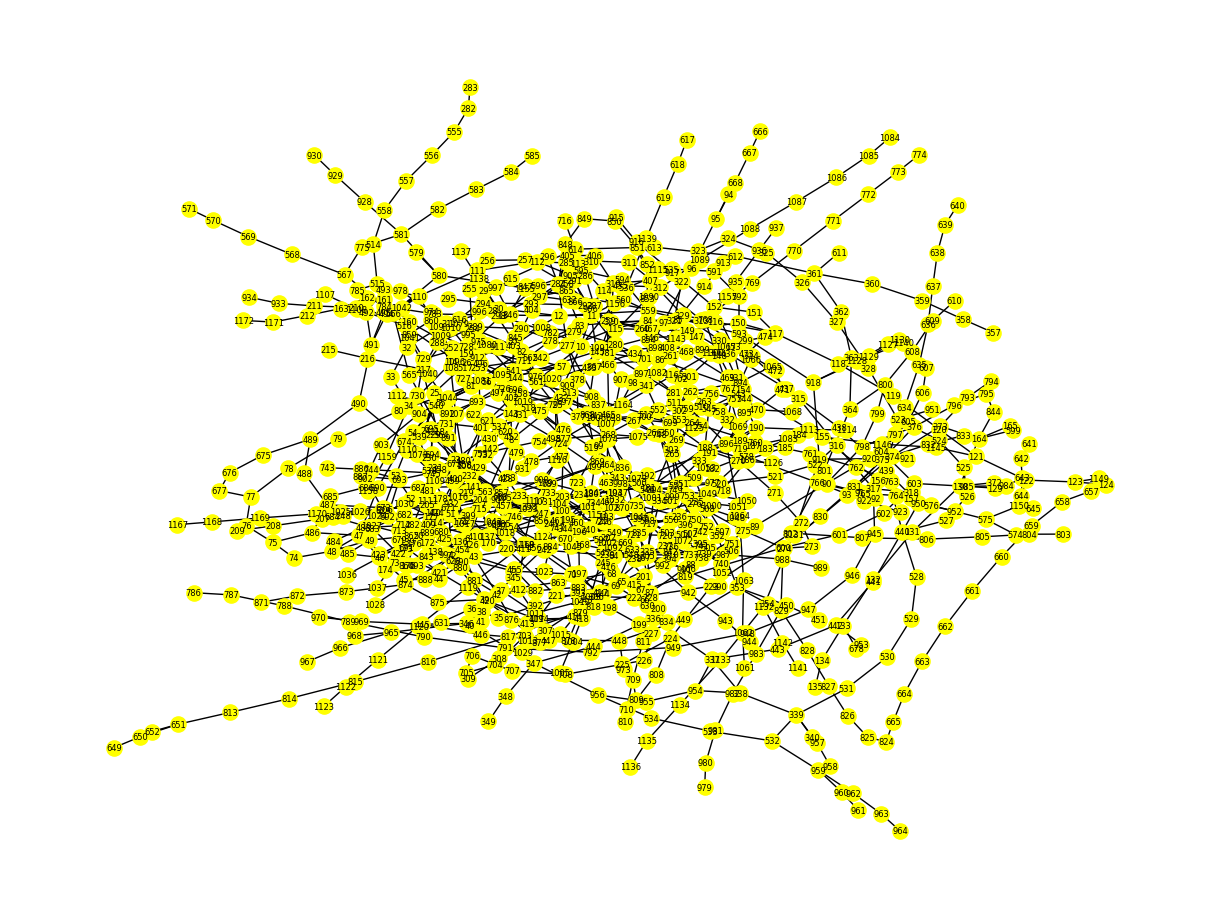

In [25]:
# Draw the graph
plt.figure(figsize=(12, 9))
nx.draw(target_city, with_labels=True,node_size=120, font_size=6, node_color='yellow')
plt.savefig('Connected-to-Target-City.png')
plt.show()

In [26]:
# Calculate diameter
d = nx.diameter(target_city)
print("Diameter: ", d)

Diameter:  62


### Density

In [27]:
density = nx.density(graph)
print(f"Density: {density}")

Density: 0.002057944872638338


### Degree Distribution

In [28]:
# list out all the nodes
nodes=list(graph.nodes())
print("All Node List\n", nodes)

All Node List
 ['1', '2', '3', '17', '4', '5', '855', '6', '7', '880', '8', '22', '23', '411', '453', '454', '889', '9', '479', '480', '561', '10', '537', '1074', '11', '536', '12', '560', '13', '27', '30', '559', '14', '596', '1138', '34', '15', '16', '18', '19', '823', '20', '388', '389', '627', '21', '409', '885', '24', '538', '1078', '1109', '25', '1110', '26', '28', '29', '31', '32', '33', '1159', '35', '36', '392', '37', '631', '38', '628', '863', '1011', '39', '40', '412', '413', '875', '876', '881', '41', '42', '43', '882', '44', '50', '51', '455', '45', '46', '888', '47', '485', '1036', '48', '73', '486', '890', '49', '74', '629', '52', '901', '53', '54', '55', '540', '56', '57', '541', '912', '86', '562', '58', '59', '60', '61', '62', '63', '1144', '64', '65', '394', '842', '66', '393', '1012', '67', '68', '69', '669', '70', '414', '415', '630', '633', '71', '417', '456', '670', '879', '72', '671', '1037', '75', '76', '77', '78', '677', '79', '80', '81', '82', '542', '904', '

In [29]:
# Calculate Degree Distribution
degrees = [graph.degree(n) for n in nodes]
print("Degree Distribution\n", degrees)

Degree Distribution
 [1, 3, 2, 3, 3, 1, 2, 2, 8, 2, 5, 3, 6, 5, 5, 5, 2, 5, 4, 2, 5, 4, 4, 3, 3, 3, 5, 2, 4, 4, 3, 4, 2, 2, 2, 3, 1, 2, 3, 5, 2, 2, 2, 3, 2, 1, 4, 4, 3, 4, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 5, 1, 2, 4, 2, 3, 8, 2, 3, 4, 2, 4, 4, 2, 5, 7, 3, 2, 4, 5, 3, 3, 5, 2, 5, 3, 1, 3, 3, 3, 2, 4, 2, 4, 2, 2, 3, 3, 2, 5, 5, 4, 4, 2, 4, 3, 1, 2, 1, 1, 3, 1, 1, 4, 5, 4, 3, 2, 2, 2, 2, 4, 6, 4, 6, 3, 2, 1, 5, 2, 3, 3, 3, 2, 4, 4, 1, 3, 2, 3, 2, 2, 2, 2, 6, 2, 3, 2, 3, 4, 1, 3, 4, 2, 2, 3, 1, 1, 2, 2, 4, 2, 4, 3, 2, 4, 2, 4, 5, 1, 3, 2, 2, 2, 2, 2, 5, 4, 8, 3, 2, 3, 2, 3, 2, 5, 6, 4, 8, 2, 2, 4, 2, 3, 6, 4, 2, 2, 2, 3, 2, 6, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 4, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 1, 1, 2, 3, 2, 2, 2, 2, 2, 1, 4, 2, 5, 1, 2, 3, 2, 1, 1, 3, 2, 3, 3, 4, 3, 2, 2, 4, 2, 2, 3, 2, 7, 2, 2, 3, 5, 4, 4, 5, 4, 2, 4, 5, 2, 2, 2, 2, 3, 2, 3, 4, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 4, 3, 2, 2, 2, 2, 3, 1, 3, 1, 2, 1, 2, 3, 2, 2, 2, 4, 5, 2, 5, 2, 2, 4, 2, 6, 7, 7, 3, 4, 1, 2, 3, 3, 4, 2, 

In [30]:
# Sort Degree Distriutions Sequence
degree_sequence = sorted([d for n, d in graph.degree()], reverse=True)
print("Sort Degree Distriutions Descending Order\n", degree_sequence)

Sort Degree Distriutions Descending Order
 [10, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3

In [31]:
# Compute the degree of each node
degree = graph.degree()
print("The degrees of every node in euro road network are\n", degree)

The degrees of every node in euro road network are
 [('1', 1), ('2', 3), ('3', 2), ('17', 3), ('4', 3), ('5', 1), ('855', 2), ('6', 2), ('7', 8), ('880', 2), ('8', 5), ('22', 3), ('23', 6), ('411', 5), ('453', 5), ('454', 5), ('889', 2), ('9', 5), ('479', 4), ('480', 2), ('561', 5), ('10', 4), ('537', 4), ('1074', 3), ('11', 3), ('536', 3), ('12', 5), ('560', 2), ('13', 4), ('27', 4), ('30', 3), ('559', 4), ('14', 2), ('596', 2), ('1138', 2), ('34', 3), ('15', 1), ('16', 2), ('18', 3), ('19', 5), ('823', 2), ('20', 2), ('388', 2), ('389', 3), ('627', 2), ('21', 1), ('409', 4), ('885', 4), ('24', 3), ('538', 4), ('1078', 1), ('1109', 2), ('25', 2), ('1110', 2), ('26', 2), ('28', 2), ('29', 2), ('31', 2), ('32', 2), ('33', 2), ('1159', 2), ('35', 2), ('36', 3), ('392', 2), ('37', 5), ('631', 1), ('38', 2), ('628', 4), ('863', 2), ('1011', 3), ('39', 8), ('40', 2), ('412', 3), ('413', 4), ('875', 2), ('876', 4), ('881', 4), ('41', 2), ('42', 5), ('43', 7), ('882', 3), ('44', 2), ('50', 4)

In [32]:
# Compute mean degree
# Compute the mean degrees
mean_degree = sum(dict(degree).values()) / node_count

# Print out the mean degrees
print("The mean degree is ", mean_degree)

The mean degree is  2.41396933560477


In [33]:
# Obtain the unique values of the degrees, and the counts of each degree value
degree_unique = np.unique(degree_sequence, return_counts=True)
print("Counts each degree of unique values\n", degree_unique)

Counts each degree of unique values
 (array([ 1,  2,  3,  4,  5,  6,  7,  8, 10]), array([190, 612, 186, 113,  47,  15,   5,   5,   1]))


### K-Core

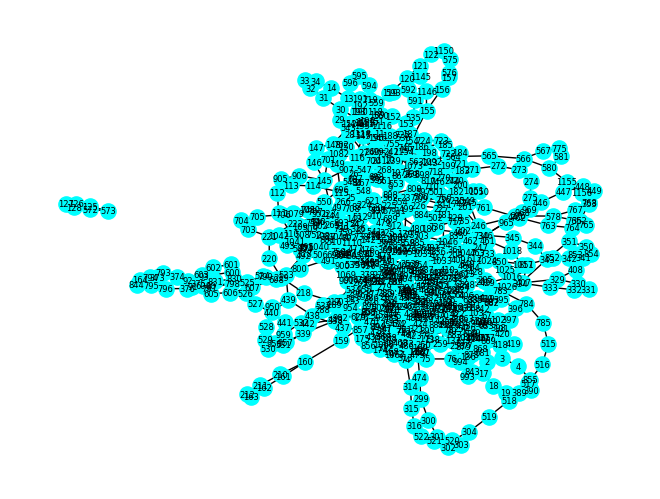

In [34]:
# Draw K-core Graph
kcore = nx.k_core(graph)
nx.draw(kcore, with_labels=True, node_size=120, font_size=6, node_color='cyan')
plt.show()

In [35]:
# Compute the k-cores
core_numbers = nx.core_number(graph)

# Sorting the k-core values.
sorted_kcore = sorted(core_numbers.items(), key=lambda x: x[1])

print(f"K-Core for every node\n{sorted_kcore}")

K-Core for every node
[('1', 1), ('5', 1), ('1138', 1), ('15', 1), ('16', 1), ('823', 1), ('20', 1), ('388', 1), ('627', 1), ('21', 1), ('1078', 1), ('1109', 1), ('1159', 1), ('631', 1), ('1036', 1), ('58', 1), ('59', 1), ('60', 1), ('61', 1), ('62', 1), ('63', 1), ('1144', 1), ('630', 1), ('1037', 1), ('632', 1), ('914', 1), ('1143', 1), ('87', 1), ('88', 1), ('89', 1), ('94', 1), ('95', 1), ('96', 1), ('668', 1), ('97', 1), ('98', 1), ('99', 1), ('123', 1), ('124', 1), ('1149', 1), ('1161', 1), ('129', 1), ('130', 1), ('131', 1), ('372', 1), ('132', 1), ('133', 1), ('134', 1), ('678', 1), ('135', 1), ('917', 1), ('165', 1), ('599', 1), ('166', 1), ('167', 1), ('1032', 1), ('1083', 1), ('1113', 1), ('932', 1), ('207', 1), ('248', 1), ('1170', 1), ('208', 1), ('209', 1), ('933', 1), ('1171', 1), ('213', 1), ('214', 1), ('249', 1), ('215', 1), ('216', 1), ('834', 1), ('250', 1), ('251', 1), ('1125', 1), ('1126', 1), ('282', 1), ('283', 1), ('555', 1), ('296', 1), ('293', 1), ('294', 1),

In [36]:
#list out the core degree that each node belongs to
core_values = list(set(core_numbers.values()))
print("Core Degree: ", core_values)

Core Degree:  [1, 2]


In [37]:
# Get the partition of the nodes based on there k-core degrees
# Create an empty list
nodes_partition=[]
# Iterate to make the length of the list of lists is equal to the numer of k-cores.
for i in range(len(core_values)):
    # Add an empty list to the main list in each iteration
    nodes_partition.append(set())

for i in range(0, len(nodes)):
    for j in range(0, len(core_values)):
        if list(core_numbers.values())[i] == core_values[j]:
            nodes_partition[j].add(nodes[i])

# Print the node partition based on k-cores
print("A partition of nodes\n", nodes_partition)

A partition of nodes
 [{'380', '1038', '776', '771', '825', '131', '917', '637', '664', '1076', '134', '777', '804', '780', '382', '632', '249', '840', '308', '1077', '973', '1141', '1172', '966', '1058', '643', '985', '610', '1048', '821', '934', '647', '208', '1130', '340', '582', '1097', '1004', '295', '1119', '787', '641', '946', '1126', '982', '355', '635', '726', '1169', '678', '1171', '1068', '873', '356', '948', '803', '568', '248', '659', '585', '348', '818', '1163', '984', '992', '384', '513', '558', '634', '743', '1131', '1099', '98', '1071', '365', '817', '1107', '814', '599', '1157', '622', '96', '828', '640', '1136', '918', '371', '89', '983', '639', '1090', '1147', '1035', '812', '819', '807', '1160', '21', '823', '209', '1003', '385', '930', '130', '1109', '790', '638', '1089', '570', '839', '1021', '716', '1022', '1115', '1144', '813', '124', '383', '167', '932', '1061', '1135', '133', '306', '1166', '369', '60', '960', '926', '838', '213', '845', '1170', '1039', '1063

In [38]:
# Count the number of nodes for each core value

# Initialize a dictionary to store the count of nodes for each core value
core_count = {}

# Count the number of nodes for each core value
for node, core_value in core_numbers.items():
    if core_value in core_count:
        core_count[core_value] += 1
    else:
        core_count[core_value] = 1

# Print the number of nodes for each core value
for core_value, count in core_count.items():
    print(f"Number of nodes for core value {core_value}: {count}")

Number of nodes for core value 1: 423
Number of nodes for core value 2: 751


## Closeness and Betweenness Centrality

In [39]:
# Finding nodes in the main core where k is maximum.
main_core = list(nx.k_core(graph))
print(f"Core with large degree\n{main_core}")

Core with large degree
['2', '3', '17', '4', '855', '6', '7', '880', '8', '22', '23', '411', '453', '454', '889', '9', '479', '480', '561', '10', '537', '1074', '11', '536', '12', '560', '13', '27', '30', '559', '14', '596', '34', '18', '19', '389', '409', '885', '24', '538', '25', '1110', '26', '28', '29', '31', '32', '33', '35', '36', '392', '37', '38', '628', '863', '1011', '39', '40', '412', '413', '875', '876', '881', '41', '42', '43', '882', '44', '50', '51', '455', '45', '46', '888', '47', '485', '48', '73', '486', '890', '49', '74', '629', '52', '901', '53', '54', '55', '540', '56', '57', '541', '912', '86', '562', '64', '65', '394', '842', '66', '393', '1012', '67', '68', '69', '669', '70', '414', '415', '633', '71', '417', '456', '670', '879', '72', '671', '75', '76', '77', '78', '677', '79', '80', '81', '82', '542', '904', '83', '84', '85', '115', '116', '154', '90', '91', '604', '798', '92', '93', '374', '375', '600', '100', '101', '137', '681', '102', '397', '398', '103', 

In [40]:
degrees = dict(nx.degree(graph))
print("The degrees of each node\n", degrees)

The degrees of each node
 {'1': 1, '2': 3, '3': 2, '17': 3, '4': 3, '5': 1, '855': 2, '6': 2, '7': 8, '880': 2, '8': 5, '22': 3, '23': 6, '411': 5, '453': 5, '454': 5, '889': 2, '9': 5, '479': 4, '480': 2, '561': 5, '10': 4, '537': 4, '1074': 3, '11': 3, '536': 3, '12': 5, '560': 2, '13': 4, '27': 4, '30': 3, '559': 4, '14': 2, '596': 2, '1138': 2, '34': 3, '15': 1, '16': 2, '18': 3, '19': 5, '823': 2, '20': 2, '388': 2, '389': 3, '627': 2, '21': 1, '409': 4, '885': 4, '24': 3, '538': 4, '1078': 1, '1109': 2, '25': 2, '1110': 2, '26': 2, '28': 2, '29': 2, '31': 2, '32': 2, '33': 2, '1159': 2, '35': 2, '36': 3, '392': 2, '37': 5, '631': 1, '38': 2, '628': 4, '863': 2, '1011': 3, '39': 8, '40': 2, '412': 3, '413': 4, '875': 2, '876': 4, '881': 4, '41': 2, '42': 5, '43': 7, '882': 3, '44': 2, '50': 4, '51': 5, '455': 3, '45': 3, '46': 5, '888': 2, '47': 5, '485': 3, '1036': 1, '48': 3, '73': 3, '486': 3, '890': 2, '49': 4, '74': 2, '629': 4, '52': 2, '901': 2, '53': 3, '54': 3, '55': 2, '

In [41]:
# Closeness centrality
closeness = nx.closeness_centrality(graph)

# Sorting the closeness centrality values from largest to smallest
sorted_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

print(f"Closeness\n{sorted_closeness}")

Closeness
[('401', 0.076865027983178), ('402', 0.07677508228008835), ('403', 0.07539498353434926), ('432', 0.07408752092264696), ('1019', 0.0740337780606897), ('253', 0.0739443796811284), ('452', 0.0737366207272198), ('404', 0.07324273059556471), ('232', 0.07322521399864294), ('284', 0.07298085844581098), ('280', 0.07278423806647996), ('279', 0.07266332445209849), ('711', 0.07261736772859333), ('433', 0.07249128595998555), ('732', 0.07243412068440794), ('1008', 0.07231436658785838), ('278', 0.07217798871593407), ('400', 0.07212131630017093), ('465', 0.0718505228722604), ('254', 0.07181120197005528), ('277', 0.0714092423539592), ('453', 0.07138149552370042), ('1020', 0.07123755889553103), ('731', 0.07082012986884942), ('233', 0.07077102121881323), ('475', 0.07077102121881323), ('291', 0.07022454773692485), ('297', 0.07002112245761374), ('428', 0.06995712752467456), ('292', 0.06951241746624617), ('7', 0.06947035882612139), ('995', 0.06925038332320393), ('434', 0.06921385610722455), ('234

In [42]:
# Printing the top 30 closeness centrality values
print("The top 30 Closeness Centrality")
for node, centrality in sorted_closeness[:30]:
    city = node_to_city[int(node)]
    print(f"Node: {node}, City:{city}, Closeness Centrality: {centrality}")

The top 30 Closeness Centrality
Node: 401, City:Warsaw, Closeness Centrality: 0.076865027983178
Node: 402, City:Brest, Closeness Centrality: 0.07677508228008835
Node: 403, City:Minsk, Closeness Centrality: 0.07539498353434926
Node: 432, City:Lviv, Closeness Centrality: 0.07408752092264696
Node: 1019, City:Lublin, Closeness Centrality: 0.0740337780606897
Node: 253, City:Kaunas, Closeness Centrality: 0.0739443796811284
Node: 452, City:Rennes, Closeness Centrality: 0.0737366207272198
Node: 404, City:Smolensk, Closeness Centrality: 0.07324273059556471
Node: 232, City:Piotrków Trybunalski, Closeness Centrality: 0.07322521399864294
Node: 284, City:Moscow, Closeness Centrality: 0.07298085844581098
Node: 280, City:Kiev, Closeness Centrality: 0.07278423806647996
Node: 279, City:Gomel, Closeness Centrality: 0.07266332445209849
Node: 711, City:Riga, Closeness Centrality: 0.07261736772859333
Node: 433, City:Rivne, Closeness Centrality: 0.07249128595998555
Node: 732, City:Radom, Closeness Centralit

In [43]:
# Betweenness Centrality
betweenness = dict(nx.betweenness_centrality(graph))

# Sorting the betweenness centrality values from largest to smallest
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)

print(f"The betweenness centrality of each node\n{sorted_betweenness}")

The betweenness centrality of each node
[('402', 0.2147942968768321), ('284', 0.21251520234235025), ('277', 0.19546510853156432), ('453', 0.17511179543874308), ('452', 0.17436583708163728), ('403', 0.17334807836925914), ('401', 0.16005124312476465), ('404', 0.15645578495653015), ('837', 0.15414032259785226), ('836', 0.15298763319939415), ('835', 0.15184706716440324), ('228', 0.15091090103746874), ('7', 0.1442936246776904), ('225', 0.13944195673026064), ('223', 0.13456230293472685), ('224', 0.13399347472084744), ('802', 0.13393649491255175), ('280', 0.13211465453396176), ('364', 0.12707564105921343), ('801', 0.12599690417790502), ('800', 0.12564484170281853), ('241', 0.12483882217823482), ('799', 0.1161158780176264), ('798', 0.11507763317029829), ('432', 0.1130402729132525), ('465', 0.11101455210422702), ('297', 0.10371675600723863), ('563', 0.10314009324682358), ('561', 0.10076750597187376), ('278', 0.09946500733862271), ('8', 0.09618860714288163), ('433', 0.0842811246515982), ('320', 

In [44]:
# Printing the top 30 betweenness centrality values
print("The top 30 Betweenness Centrality")
for node, centrality in sorted_betweenness[:30]:
    city = node_to_city[int(node)]
    print(f"Node: {node}, City:{city}, betweenness Centrality: {centrality}")

The top 30 Betweenness Centrality
Node: 402, City:Brest, betweenness Centrality: 0.2147942968768321
Node: 284, City:Moscow, betweenness Centrality: 0.21251520234235025
Node: 277, City:Saint Petersburg, betweenness Centrality: 0.19546510853156432
Node: 453, City:Le Mans, betweenness Centrality: 0.17511179543874308
Node: 452, City:Rennes, betweenness Centrality: 0.17436583708163728
Node: 403, City:Minsk, betweenness Centrality: 0.17334807836925914
Node: 401, City:Warsaw, betweenness Centrality: 0.16005124312476465
Node: 404, City:Smolensk, betweenness Centrality: 0.15645578495653015
Node: 837, City:Vyborg, betweenness Centrality: 0.15414032259785226
Node: 836, City:Vaalimaa, betweenness Centrality: 0.15298763319939415
Node: 835, City:Kotka, betweenness Centrality: 0.15184706716440324
Node: 228, City:Helsinki, betweenness Centrality: 0.15091090103746874
Node: 7, City:Paris, betweenness Centrality: 0.1442936246776904
Node: 225, City:Jyväskylä, betweenness Centrality: 0.13944195673026064
No

In [45]:
# Save degree, closeness, and betweenness centralities in a dataframe
euro_road_df = pd.DataFrame.from_dict([degrees, closeness, betweenness]).T
euro_road_df.columns = ["degree", "closeness", "betweenness"]
print("Data Frame\n", euro_road_df)

Data Frame
       degree  closeness  betweenness
1        1.0   0.004905     0.000000
2        3.0   0.005752     0.000121
3        2.0   0.005151     0.000039
17       3.0   0.006513     0.000236
4        3.0   0.005087     0.000074
...      ...        ...          ...
1168     2.0   0.036079     0.001509
1169     2.0   0.037608     0.003014
1172     1.0   0.031110     0.000000
1173     1.0   0.000853     0.000000
1174     1.0   0.000853     0.000000

[1174 rows x 3 columns]


In [46]:
# save the dataframe in a csv file
euro_road_df.to_csv('euro_road_data_frame.csv',
                  encoding='utf-8')

### Clustering Coefficient

In [47]:
# Compute the local clustering coefficient of every node
clustering_coefficients = nx.clustering(graph, nodes=None, weight=None)

# Sorting the clustering coefficient values from largest to smallest
sorted_cluster_coef = sorted(clustering_coefficients.items(), key=lambda x: x[1], reverse=True)

print(f"Clustering coefficient\n{sorted_cluster_coef}")

Clustering coefficient
[('157', 1.0), ('205', 1.0), ('463', 1.0), ('544', 1.0), ('700', 1.0), ('50', 0.3333333333333333), ('541', 0.3333333333333333), ('542', 0.3333333333333333), ('673', 0.3333333333333333), ('120', 0.3333333333333333), ('121', 0.3333333333333333), ('1145', 0.3333333333333333), ('179', 0.3333333333333333), ('497', 0.3333333333333333), ('156', 0.3333333333333333), ('576', 0.3333333333333333), ('187', 0.3333333333333333), ('699', 0.3333333333333333), ('192', 0.3333333333333333), ('193', 0.3333333333333333), ('195', 0.3333333333333333), ('434', 0.3333333333333333), ('338', 0.3333333333333333), ('954', 0.3333333333333333), ('732', 0.3333333333333333), ('950', 0.3333333333333333), ('478', 0.3333333333333333), ('9', 0.2), ('561', 0.2), ('143', 0.2), ('545', 0.2), ('194', 0.2), ('479', 0.16666666666666666), ('10', 0.16666666666666666), ('413', 0.16666666666666666), ('876', 0.16666666666666666), ('49', 0.16666666666666666), ('629', 0.16666666666666666), ('57', 0.1666666666666

In [48]:
# Printing the top 30 clustering coefficient values
print("Top 30 clustering coefficient values")
for node, coef in sorted_cluster_coef[:30]:
    city = node_to_city[int(node)]
    print(f"Node: {node}, City:{city}, Clustering Coefficient: {coef}")

Top 30 clustering coefficient values
Node: 157, City:Brindisi, Clustering Coefficient: 1.0
Node: 205, City:Domokos, Clustering Coefficient: 1.0
Node: 463, City:Vyšné Nemecké, Clustering Coefficient: 1.0
Node: 544, City:Postojna, Clustering Coefficient: 1.0
Node: 700, City:Spielfeld, Clustering Coefficient: 1.0
Node: 50, City:Lausanne, Clustering Coefficient: 0.3333333333333333
Node: 541, City:Tortona, Clustering Coefficient: 0.3333333333333333
Node: 542, City:Brescia, Clustering Coefficient: 0.3333333333333333
Node: 673, City:Ulm, Clustering Coefficient: 0.3333333333333333
Node: 120, City:Naples, Clustering Coefficient: 0.3333333333333333
Node: 121, City:Salerno, Clustering Coefficient: 0.3333333333333333
Node: 1145, City:Avellino, Clustering Coefficient: 0.3333333333333333
Node: 179, City:Jihlava, Clustering Coefficient: 0.3333333333333333
Node: 497, City:Sattledt, Clustering Coefficient: 0.3333333333333333
Node: 156, City:Bari, Clustering Coefficient: 0.3333333333333333
Node: 576, Ci

In [49]:
# Compute the clustering coefficient for a particular node

# Please Input Node Number
selected_node = '105'

# Calculate Clustering Coefficient
clustering = nx.clustering(graph, nodes=selected_node, weight=None)

# Print Result
print(f"clustering coefficient: {clustering}")

clustering coefficient: 0.1


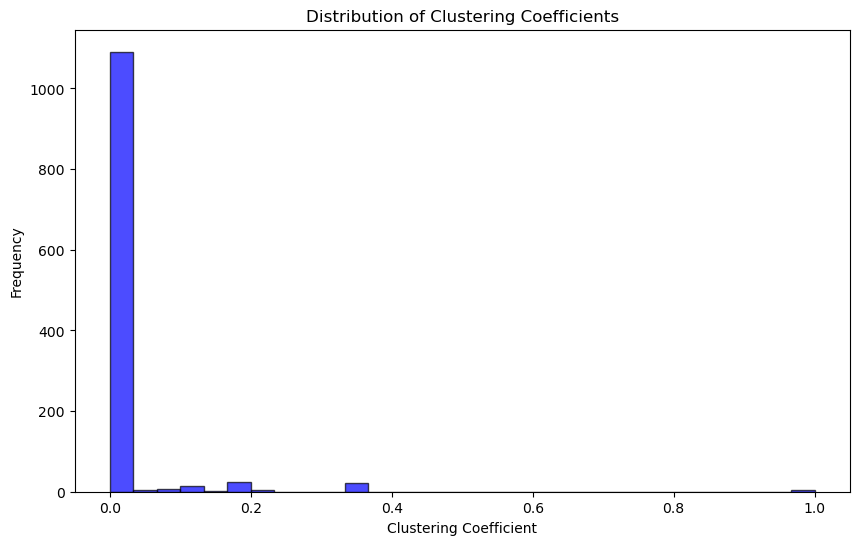

In [50]:
# Extract the clustering coefficient values
clustering_values = list(clustering_coefficients.values())

# Plot the distribution of clustering coefficients
plt.figure(figsize=(10, 6))
plt.hist(clustering_values, bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Clustering Coefficients')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.show()

### Global Clustering Coefficient

In [51]:
# Calculate average local clustering coefficient and global clustering coefficient
average_local_clustering_coefficient = st.mean(nx.clustering(graph).values())
global_clustering_coefficient = nx.transitivity(graph)

# Print the calculated coefficients
print("Average Local Clustering Coefficient:", average_local_clustering_coefficient)
print("Global Clustering Coefficient:", global_clustering_coefficient)

Average Local Clustering Coefficient: 0.016731564857629593
Global Clustering Coefficient: 0.0338863395693611


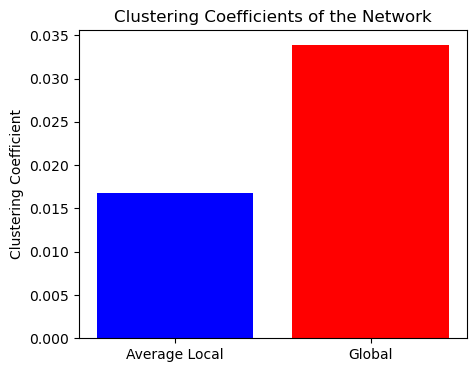

In [52]:
# Compare average clustering coefficient and global clustering coefficient
coefficients = [average_local_clustering_coefficient, global_clustering_coefficient]
labels = ['Average Local', 'Global']

plt.figure(figsize=(5, 4))
plt.bar(labels, coefficients, color=['blue', 'red'])
plt.ylabel('Clustering Coefficient')
plt.title('Clustering Coefficients of the Network')
plt.show()

 ### Modularity

In [53]:
partition = nx_comm.is_partition(graph, nodes_partition)
print("Partition: ", partition)

Partition:  True


In [54]:
modularity = nx_comm.modularity(graph, nodes_partition)
print(f"Modularity: {modularity}")

Modularity: 0.2811278412302672


### Watts-Strogatz Model

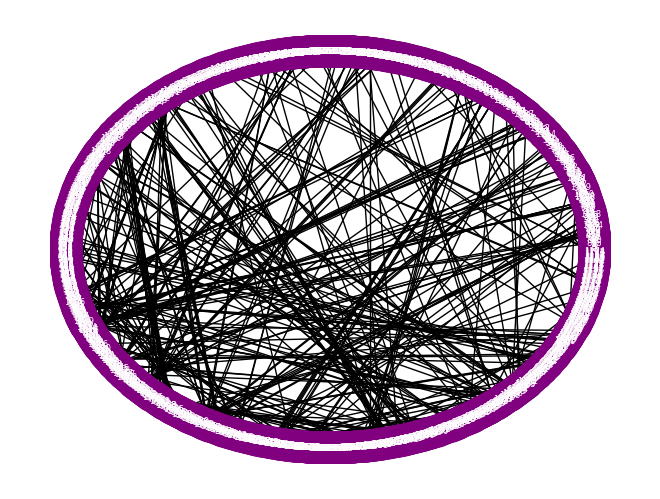

In [55]:
nx.draw_circular(graph, with_labels=True, node_size=500, font_size=6, node_color='purple', font_color='white')
plt.savefig('Watts-Strogatz.png')
plt.show()

The mean degree is 2.41396933560477


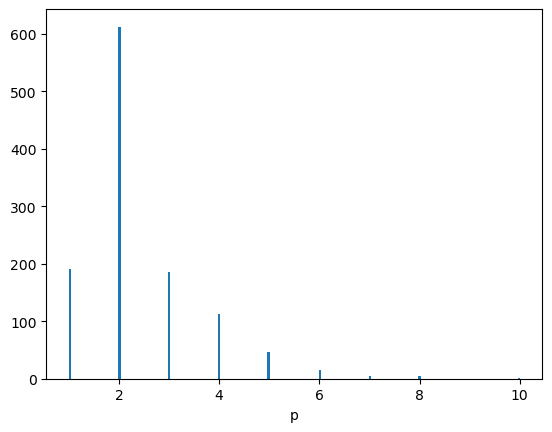

In [56]:
# Observe the degree distribution by watts-strogatz model
degrees = dict(nx.degree(graph)).values()
print("The mean degree is", st.mean(degrees))
plt.hist(degrees, density=False, bins=200);
plt.xlabel("p")
plt.savefig('degree-distribution.png')
plt.show()

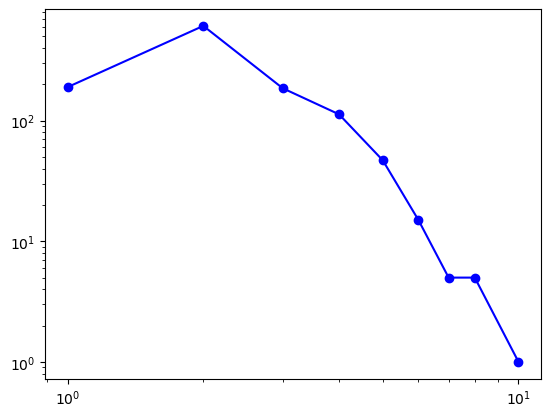

In [57]:
# Visulaize the log-log plot of the degrees
degrees = dict(nx.degree(graph))
degree_sequence = sorted(set(degrees.values()), reverse=True)  # degree sequence
hist = [list(degrees.values()).count(x) for x in degree_sequence]
plt.loglog(degree_sequence, hist, 'b', marker='o')
plt.savefig('log-log-plot.png')
plt.show()